**Course**: Data Visualization (Prof. Dr. Heike Leitte, Luisa Vollmer, RPTU Kaiserslautern),   **Name**: Erik Schwede,   **Date**: 23.01.2024

<div class="alert alert-info">

# Assignment 5 - Graphs
</div>



### Outline and goals

In the fifth assignment, we will revise graph drawing and graph analysis using three types of graphs. You will learn about the [networkx library](https://networkx.github.io) and the [pygraphviz library](https://pygraphviz.github.io) for graph analysis and drawing. The goals of the assignment are:
- be able to decide on an appropriate layout for a given graph and discuss aesthetics criteria
- draw a graph in the notebook and manipulate the visualization
- analyze a given graph algorithmicly and visually

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

In [8]:
import pandas as pd
import numpy as np

import networkx as nx # there have been problems with networkx and pygraphviz on windows in the past. If possible, try a different system.
import itertools
from bokeh.palettes import Category20

from IPython.display import Image

<div class="alert alert-info">

## Exercise 1 - Graph algorithms recap
</div>

In the first exercise, you will work on a synthetic graph to practice fundamental operations and revise the concepts from the lecture. 


**1.1 Manual drawing**

G1 below is defined as a directed graph [nx.DiGraph](https://networkx.github.io/documentation/stable/reference/classes/digraph.html). Edges are given as ordered tuples `(start_node, end_node)`.  

<div class="alert alert-success">
    
- Draw the graph defined in G1 manually (no prove required). Do not follow the rules learned in class, but create a layout to your liking.
- Did you follow aesthetics criteria? If yes, which? Either case, which ones should be followed.
- Which type of graph is G1?
- Which types of layouts are applicable?
</div>

<div class="alert alert-warning">

- I try to create a directed graph
- Trying to avoid overlap of edges
</div>

In [12]:
# import image module 
from IPython.display import Image 
  
# get the image 
Image(url="GraphHandDraw.jpeg") 


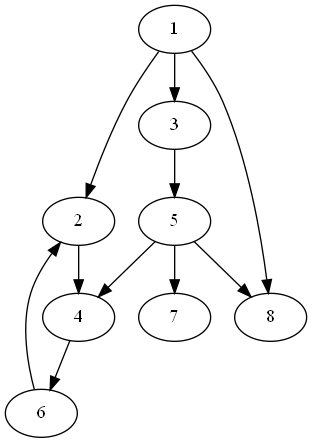

In [13]:
G1 = nx.DiGraph()
G1.add_edges_from([(1,2), (1,3), (2,4), (3,5), (5,4), (4,6), (6,2), (5,7), (5,8), (1,8)])
Image(nx.nx_agraph.to_agraph(G1).draw(format='png', prog='dot'))

**1.2 Graph drawing**
    
The [pygraphviz library](https://pygraphviz.github.io) is used to obtain the layout. Pygraphviz is partly integrated into networkx and uses the [AGraph](http://pygraphviz.github.io/documentation/pygraphviz-1.5/reference/agraph.html) graph representation. The result image of the graph drawing routine can be exported or rendered in the notebook using the [`Image`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image) class to encapsulate it.

Using the graph drawing above, answer the following questions:

<div class="alert alert-success">
    
- Which layout algorithm is used to render G1? 
- Does the graph G1 contain cycles? If yes, which?
- Why is node 2 rendered on level 3?
- Compute the forward, backward and cross edges of G1. Children are handeled in order of their id, smallest first. The method `classify_edges` below implements the edge classification for recap.
</div>

<div class="alert alert-warning">

- The dot layout algorithm is used
- Yes it does node 2, 4 and 6 form a cycle
- Node 2 is renderd on level 3 because it will reduce the overall edge length. If node 2 would be on level 2 the edges to 6 and 4 will be longer and the edge to 1 will be shorter but the overall edge length will be longer
</div>

In [14]:
def classify_edges(G):
    '''Edge classification of a directed graph using depth first search.
    '''
    # nodes that have been visited in the traversal
    marked = dict([(n,0) for n in sorted(G.nodes)])

    # do depth-first-traversal and classify edges
    # traverse edges with (start, end, edge type d)
    for s,e,d in nx.dfs_labeled_edges(G):
        if (s==e):
            continue
            
        # mark start-node as visited
        marked[s] = 1    

        # skip return-to-child-node step in DFS
        if  (d == 'reverse'):
            continue
    
        # if end-node has not been visited yet, its a tree edge
        if marked[e] == 0:
            print(s,e,'tree edge')
            marked[e] = 1
        # end-node has been visited before
        else:
            # create graph without current edge
            G_ = G.copy()
            G_.remove_edge(s,e)
            if e in nx.descendants(G_, s):
                print(s,e,'forward edge')
            elif e in nx.ancestors(G_, s):
                print(s,e,'backward edge')
            else:
                print(s,e,'cross edge')
        
classify_edges(G1)

1 2 tree edge
2 4 tree edge
4 6 tree edge
6 2 backward edge
1 3 tree edge
3 5 tree edge
5 4 cross edge
5 7 tree edge
5 8 tree edge
1 8 forward edge


<div class="alert alert-info">

## Exercise 2 - Working with hierarchies
</div>

The file [`programmingLanguages.gml`](programmingLanguages.gml) contains information on the genealogy of some of the more influential or widely used programming languages as discussed by (Scott, 2000). Edges indicate principal influences on design. The resulting graph encodes the flow of ideas through the languages and their paradigms. Many influences, of course, cannot be shown in a single figure, but the chart can give a good initial sense of dependencies. 

Note that the graph also contains a date for each language which indicates the approximate time at which its features became widely known. This information can be used for rendering but is not incorporated in the current layout.

In [15]:
G2 = nx.read_gml("programmingLanguages.gml")

print("nodes in the graph", G2.nodes(data=True))
print()

language = 'Simula'
print(language, "became widely known in", G2.nodes[language]['year'])

nodes in the graph [('Fortran I', {'year': 1957}), ('Fortran II', {'year': 1958}), ('Fortran IV', {'year': 1965}), ('Fortran 77', {'year': 1978}), ('Fortran 90', {'year': 1991}), ('Algol 58', {'year': 1958}), ('Basic', {'year': 1964}), ('Visual Basic', {'year': 1991}), ('Fortran 95', {'year': 1997}), ('Algol 60', {'year': 1960}), ('Algol W', {'year': 1966}), ('Pascal', {'year': 1971}), ('Modula-2', {'year': 1978}), ('Oberon', {'year': 1988}), ('Modula-3', {'year': 1991}), ('Algol 68', {'year': 1968}), ('BCPL', {'year': 1966}), ('C', {'year': 1972}), ('Simula', {'year': 1965}), ('Simula 67', {'year': 1967}), ('Ada', {'year': 1980}), ('Ada 95', {'year': 1995}), ('C++', {'year': 1983}), ('Smalltalk 80', {'year': 1980}), ('Eiffel', {'year': 1986}), ('Java', {'year': 1995}), ('Lisp', {'year': 1959}), ('Scheme', {'year': 1975}), ('Common Lisp', {'year': 1984}), ('CLOS', {'year': 1988}), ('ML', {'year': 1973}), ('Miranda', {'year': 1986}), ('Haskell', {'year': 1990})]

Simula became widely kn

The chart below displays the programming languages graph. Answer the following questions and give a graphical answer by coloring respective nodes. 
    
<div class="alert alert-success">   
    
- **Initial languages**: Which languages were not influenced by others? 
- **Long history**: Which language has the longest history, i.e., the longest path to a source node? 
    - What is the path length? 
    - Is the answer unique?
- **Not influenced by Fortran I**: List all languages that were not influenced by Fortran I (directly or indirectly). 
</div>

**Example below**: All languages that influenced Java directly or indirectly.
    
**Hints**: 
- Networkx provides [methods for directed graphs](https://networkx.github.io/documentation/stable/reference/classes/digraph.html) (see Method section at bottom of page) and 
- additional [algorithms for directed acyclic graphs](https://networkx.github.io/documentation/stable/reference/algorithms/dag.html).
- Each question can be answered with one line of code.

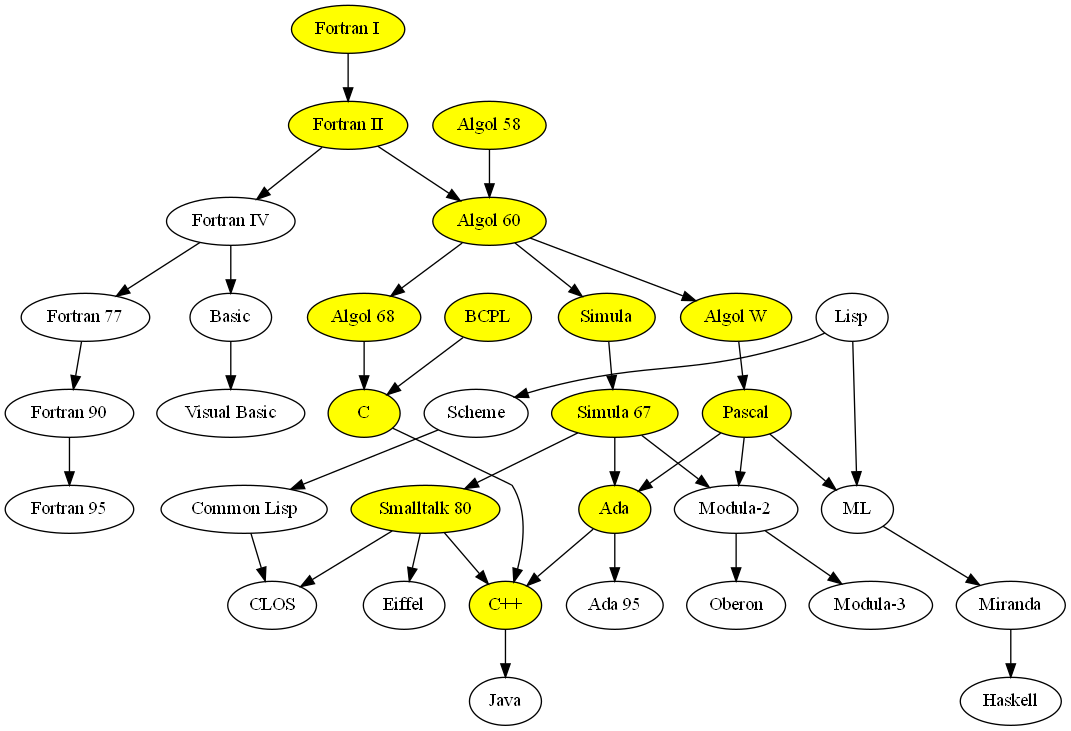

In [19]:
A2 = nx.nx_agraph.to_agraph(G2)
A2.node_attr['style']='filled'

influences = nx.algorithms.dag.ancestors(G2,'Java')
descendants = nx.algorithms.dag.descendants(G2, 'Fortran I')
# TODO: insert your filters here

for n_id in G2:
    n = A2.get_node(n_id)
    if n_id in influences:
        n.attr['fillcolor']='yellow'
    else:
        n.attr['fillcolor']='white'
    
Image(A2.draw(format='png', prog='dot'))

<div class="alert alert-warning">

- Initial languages: Fortran I, Algol 58, Lisp, BCPL
- Longest history: Haskell, Java. For Java there are two possible paths with different lengths 6 previous languages or 7 previous languages. Haskel has 6 previous languages
- Not influenced by Fortran I: Algol 58, Lisp, BCPL, Scheme, Common Lisp
</div>

<div class="alert alert-info">

## Exercise 3 - Analyzing social networks
</div>

In the last exercise, you will analyze social networks. Choose ***ONE*** of two datasets each representing a co-appearance network:
- characters in the novel Les Miserables by Victor Hugo and how often they are together on stage (edges)
- characters in fan fiction in the Harry Potter universe and a count on how often they occur together in fan fictions (edges)

A critical element in the analysis are communities. A community in a graph is a set of nodes that is densely connected, i.e., many of the nodes in a community feature pairwise edges. 

The graphs below represent the respective co-occurences. Both graphs are drawn using the [`neato`](https://www.graphviz.org/pdf/neatoguide.pdf) algorithm of pygraphviz which uses a force-directed layout. Communitites are detected using the 
[Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html) from networkx. Each community is colored in a unique color in the graph.
    
For your chosen social network, answer the following questions:
<div class="alert alert-success">
    
- What are aesthetics criteria aimed for by force-directed layout?
- How good are these criteria met in the graph visualization? Rate each criterion using good, medium, poor and find an area in the graph to support your rating.
- Below you can find a list of social groups present in the novel. Check if they are detected by the automatic community detection. When do the communities based on human knowledge and graph analysis match and when not?
- Can you detect characters that should belong to multiple communities? 
    - by exploring the graph structure and maybe from your background knowledge 
    - Advanced question: How could you visualize the affiliation with two or more communities?
</div>

### Les Miserables

The dataset [`lesmiserables.gml`](lesmiserables.gml) contains a coappearance network of characters in the novel [Les Miserables](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables) by Victor Hugo. The [graph](lesmiserables_graph.png) is rendered using a force-directed layout and colored by a community affiliation detected using the [Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html).

*Data courtesy: D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).*

In [23]:
G3 = nx.read_gml("lesmiserables.gml")
A3 = nx.nx_agraph.to_agraph(G3)
A3.node_attr['style']='filled'

for e in A3.edges_iter():
    '''Scale the line_width of the edges by the edge weight
    '''
    e.attr['penwidth'] = int(int(e.attr['value'])/5)*2+1
    
def color_communities(G,A,k=9):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    comm = next(itertools.islice(comp, k, None))
    print("quality {:.3f}".format(nx.algorithms.community.partition_quality(G,comm)[1]), "with", len(comm), "communities.")

    def color_nodes(A, communities):
        '''Color the nodes of an AGraph based on a given community structure
        '''
        for ids,c in zip(list(sorted(c) for c in communities), Category20[20]):
            for i in ids:
                n = A.get_node(i)
                n.attr['fillcolor']=c

    color_nodes(A, comm)
    
color_communities(G3, A3, 9)

quality 0.918 with 11 communities.


A [list of characters](https://en.wikipedia.org/wiki/List_of_Les_Misérables_characters) can be found on wikipedia.

Communitites in Les Miserables in order of appearance:
- **Main characters**: Valjean, Cosette, Marius
- **People in church**: Myriel, MlleBaptistine, MmeMagloire
- **Grisettes (working women)**: Fantine, Zephine, Dahlia, Favourite
- **Wealthy students**: Blacheville, Tholomyes, Listolier, Fameuil
- **Bandits + (family)**: MmeThenardier, Thenardier, (Cosette), (Gavroche), Eponine, Anzelma, Montparnasse, Claquesous, Babet, Gueulemer, Brujon
- **Police and court**: Javert, Bamatabois, Champmathieu
- **Rich monarchists**: Gillenormand, MlleGillenormand, MmePontmercy, LtGillenormand
- **Revolutionary student club**: Marius, Enjolras, Combeferre, Prouvaire, Feuilly, Courfeyrac, Bahorel, Bossuet, Joly, Grantaire
- **Brothers**: Gavroche, Child1, Child2

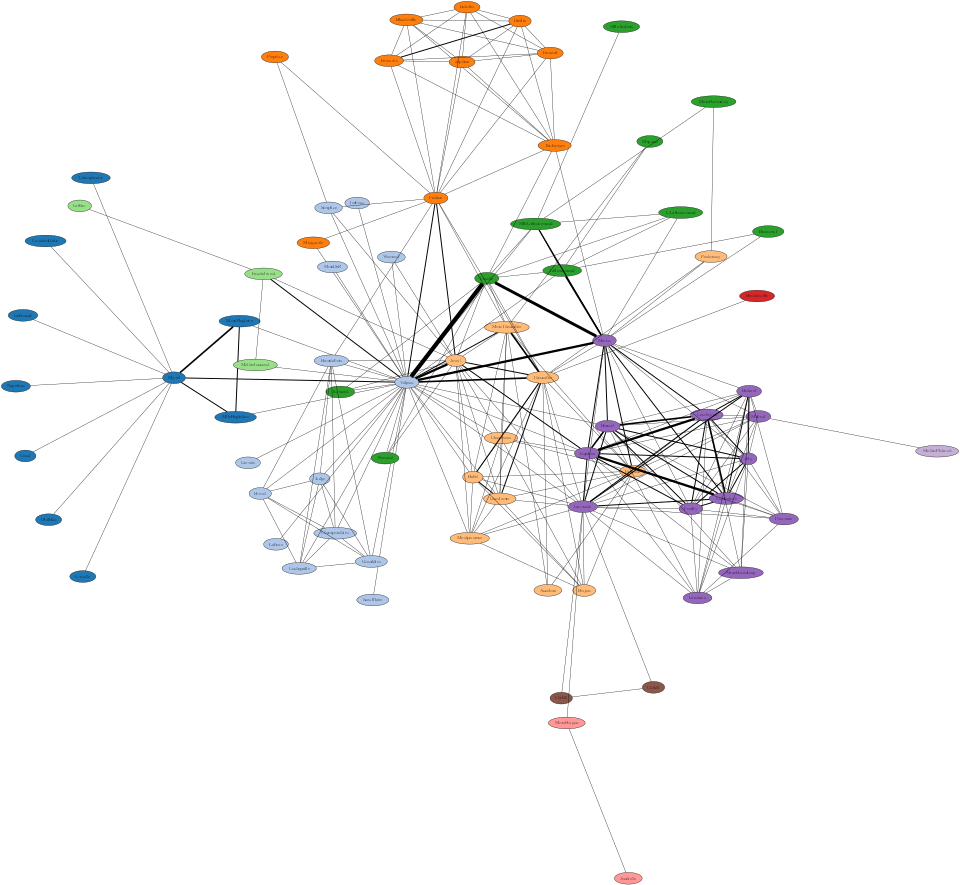

In [24]:
# Show image in notebook
Image(A3.draw(format='png', prog='neato', args="-Goverlap=scale -Gsize=10,15 -Gepsilon=.001 -Gmaxiter=50"))

# Export image
# A3.draw('lesmiserables_graph.png', format='png', prog='neato', args="-Goverlap=scale -Gsize=50,50 -Gepsilon=.001 -Gmaxiter=50")

# You can control the size of the image with the graph parameter -Gsize

<div class="alert alert-warning">

...
</div>

### Harrry Potter fan fiction

The Harry Potter fan fiction dataset contains a co-appearance network of characters in the Harry Potter fan fiction universe. The [graph is rendered](harrypotter_graph.png) using a force-directed layout and colored by a community affiliation detected using the [Girvan-Newman community detection algorithm](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html).

*Data source: https://gist.github.com/allisonking/c9f6ea277e4194cf7e13f49efb83b5b5*

**Preprocessing**:

Load the Harry Potter fan fiction co-occurence data and turn this into a list of co-occurences.

In [25]:
harry_potter = pd.read_csv('HarryPotter_cooccurrence.txt')

# get the upper triangular matrix and turn into a list
harry_potter = harry_potter.where(np.triu(np.ones(harry_potter.shape), k=1).astype(bool)).stack().reset_index()
# rename the columns
harry_potter.columns = ['A','B','cnt']
# filter character pairs that co-occur at least 300 times
harry_potter = harry_potter[harry_potter.cnt >= 300].reset_index(drop=True)

Create a graph from the input data.

In [26]:
G4 = nx.Graph()

r = harry_potter.apply(lambda x: G4.add_edge(x.A, x.B, weight=x.cnt), axis=1)

# remove the meta group of original characters (OC)
G4.remove_node('OC')

A4 = nx.nx_agraph.to_agraph(G4)
A4.node_attr['style']='filled'

for e in A4.edges_iter():
    '''Scale the line_width of the edges by the edge weight
    '''
    e.attr['penwidth'] = min(10000,float(e.attr['weight']))/1000+1

def color_communities(G,A,k=11):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    comm = next(itertools.islice(comp, k, None))
    print("quality {:.3f}".format(nx.algorithms.community.partition_quality(G,comm)[1]), "with", len(comm), "communities.")

    def color_nodes(A, communities):
        '''Color the nodes of an AGraph based on a given community structure
        '''
        for ids,c in zip(list(sorted(c) for c in communities), Category20[20]):
            for i in ids:
                n = A.get_node(i)
                n.attr['fillcolor']=c

    color_nodes(A, comm)
    
color_communities(G4, A4, 11)

quality 0.871 with 14 communities.


Communitites in the Harry Potter universe:
- **Students**: Harry P., Ron W., Hermione G., Ginny W., Draco M., Neville L., Luna L., Pansy P., Blaise Z., Cedric D., Cho C.
- **Senior students**: Katie B., Oliver W., Percy W., George W., Fred W.
- **Teachers**: Albus D., Severus S., Minerva M.
- **Death Eaters**: Voldemort, Tom R. Jr., Lucius M., Narcissa M., Bellatrix L.
- **Marauders**: Marauders, James P., Sirius B., Remus L., Peter P. 
- **Next generation kids**: Lily Luna P., James S. P., Albus S. P., Rose L., Teddy L., Scorpius M., Victoire W.

Additional communities
- the various families: Potter, Weasly, Malfoy, Black, Tonks, Lestrange, ...
- Order of the Phoenix
- school houses and school teams

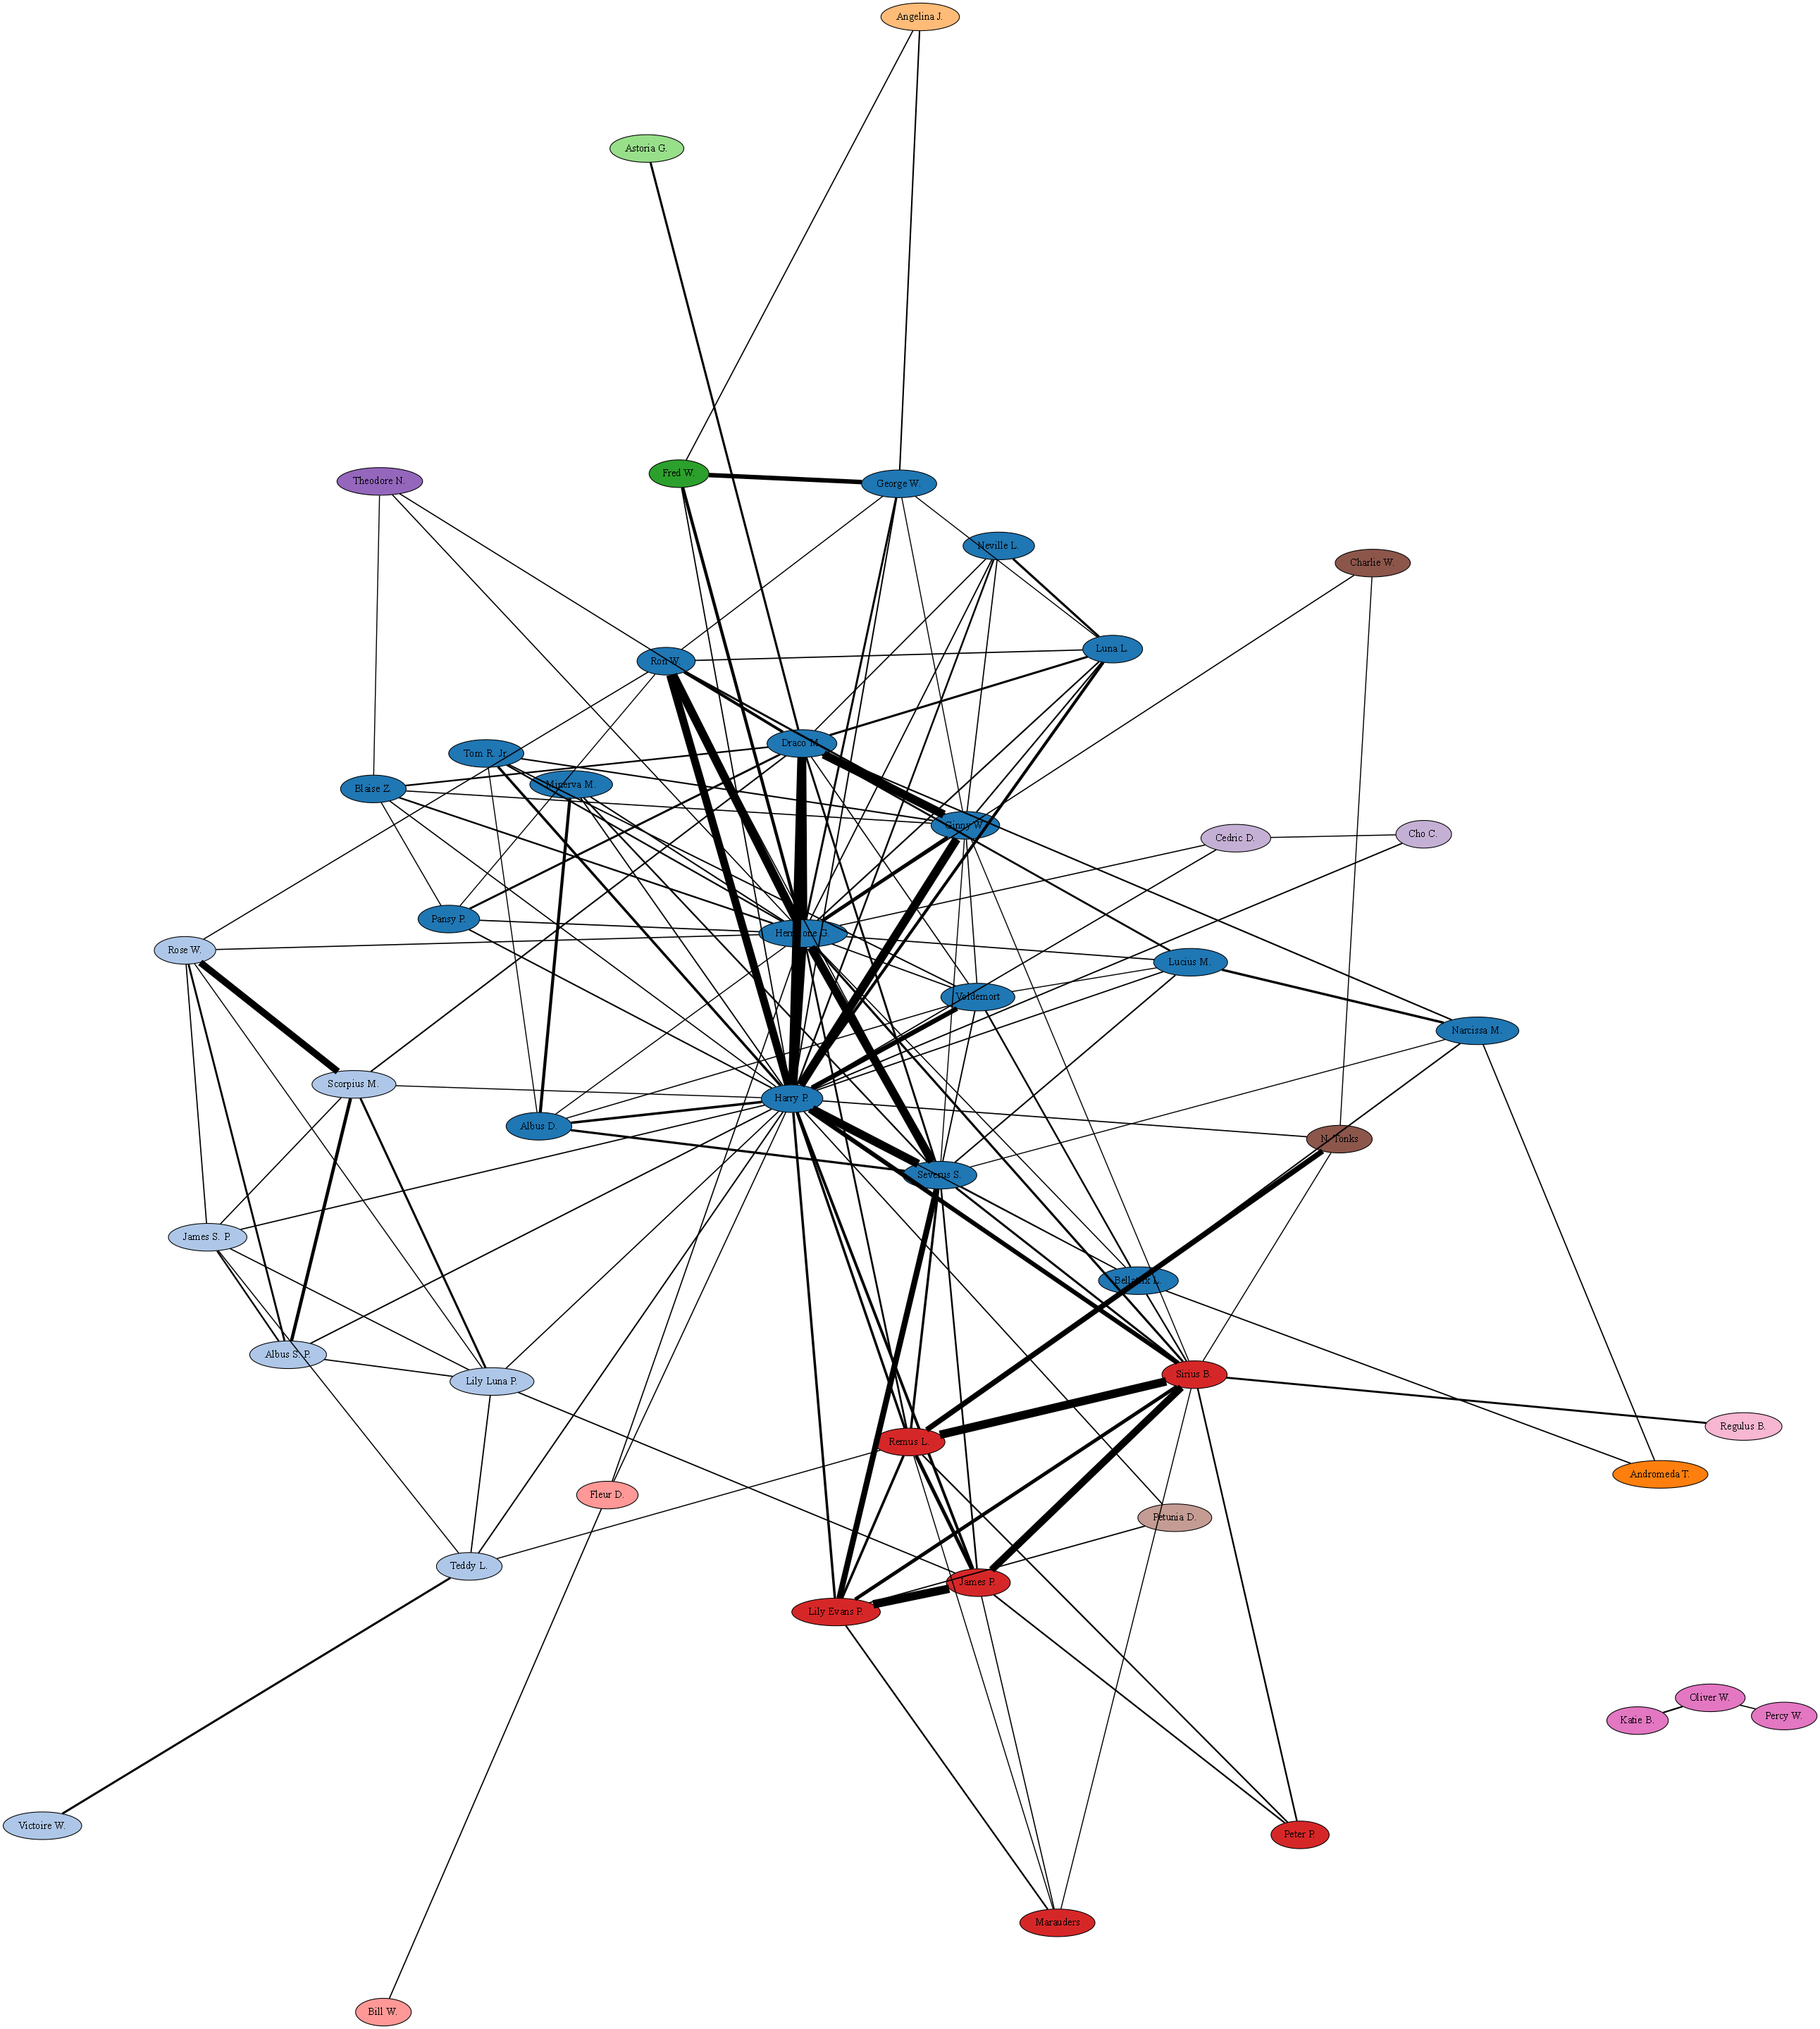

In [29]:
# Show image in notebook
Image(A4.draw(format='png', prog='neato', args="-Goverlap=scale -Gsize=30,30 -Gepsilon=.001 -Gmaxiter=50"))

# Export image
# A4.draw('harrypotter_graph.png', format='png', prog='neato', args="-Goverlap=scale -Gsize=50,50 -Gepsilon=.001 -Gmaxiter=50")

# You can control the size of the image with the graph parameter -Gsize

<div class="alert alert-warning">

- Short and uniform edge lengths, symmetry, minimize edge crossings, minimize edges crossing nodes, compact layout
- Rating for the criteria:
    - Short and uniform edge lengths: good in the middle of the graph the nodes are close together because they share a lot of edges so they are close together to minimize the edge length
    - symmetry: medium overall the graph is symmetrical but some childs are really far out while others are closer
    - minimize edge crossing: good overall good some minor mistakes for example Fluer could be placed a little bit higher to avoid one edge crossing
    - minimize edges crossing nodes: medium some crosses could be avoided for example Petunia could be moved a little to the left to avoid the edge crossing 
    - compact layout: medium some edges are really long. This could be avoided in order to make the layout more compact for example the edge from Bill W. to Fleur D.
- Community detection:
    - Students: All students have the same color besides Cedric D. and Cho C.
    - Senior students: Oliver W. Katie B. and Perry W. got detected as one community Fred abd George are in different communitys
    - Teachers: All teachers are in the same community but it is the same community as the students are in
    - Death eaters: all death eaters are in the same community bit it is the same community as the students and teachers
    - Marauders: All marauders are detected in the same community but also Lily Evans P. is in this community which is not true
    - Next generation kids: all next generation kids are in the same community
    - Overall the community detection is working. But when different communitys interact a lot with each other it is hard to distingue for them for the algorithm. Additional information would help like what kind of interaction was performed to detect the communitys more efficiently
</div>

### Estimate good number of communities in graph

First do the community detection for the parameters (0,k):

In [32]:
k=30
G = G4

comp = nx.algorithms.community.centrality.girvan_newman(G)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
ks = []
qs = []
for i,communities in enumerate(limited):
    ks.append(i)
    qs.append(nx.algorithms.community.partition_quality(G,communities)[1])

<div class="alert alert-success">
    
Plot these values and look for the "knee" or "elbow" in the function, i.e., the value where the curve "bends" and additional communities have little quality increase. 
    
</div>

<div class="alert alert-warning">
    
For **Harry Potter** the highest quality can be achieved at around 20 splitting parameters
</div>

In [31]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

p = figure(width=400, height=400, title="Quality of GN-Community Measure in Harry Potter")

# add a line renderer
p.line(ks, qs, line_width=2)
p.xaxis.axis_label = 'Girvan Newman splitting parameter'
p.yaxis.axis_label = 'quality'

show(p)

Loading BokehJS ...